# Adding Dependences

In [1]:
using DelimitedFiles
using Images
using Plots

# Extract Matrix From Image

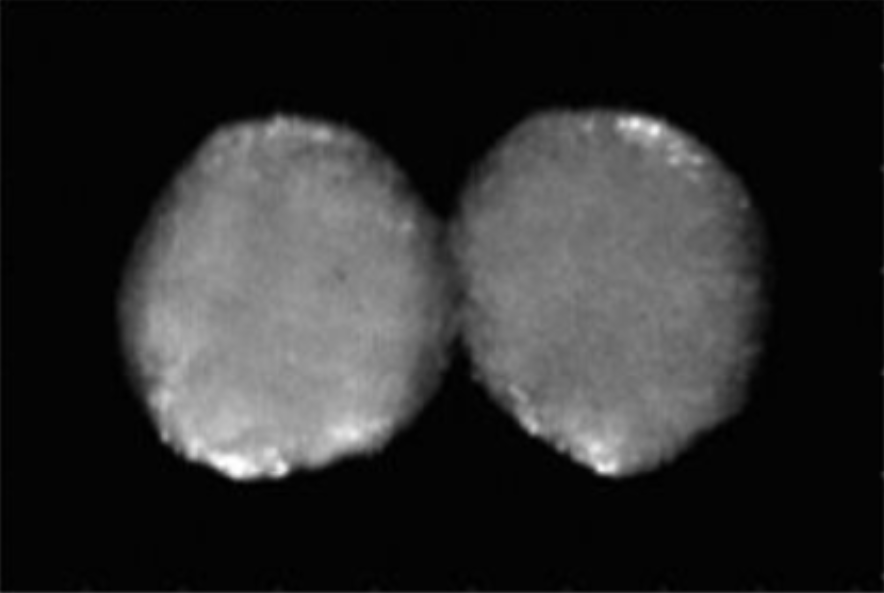

In [2]:
img = load("A.png")

## Extracting the grayscale on the image

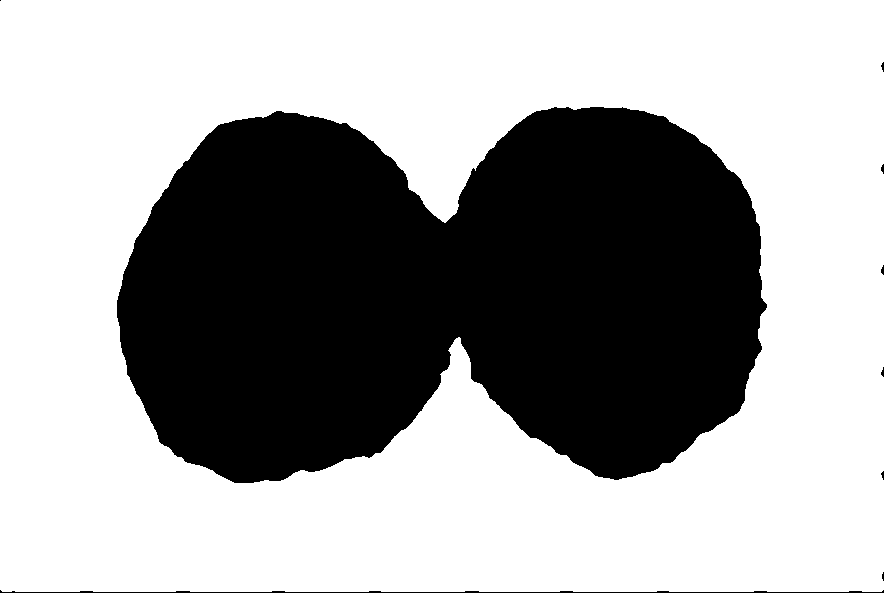

In [3]:
img_channel = Gray.(.!(Gray.(img) .> 0.1))
# img_channel =Gray.(Gray_img)

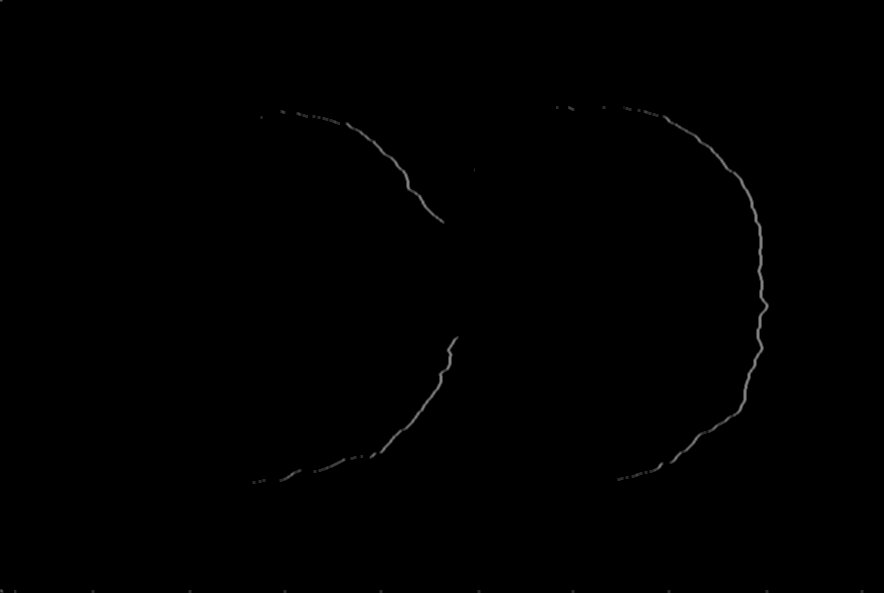

In [4]:
krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
grad_h = imfilter(img_channel, krnl_h')

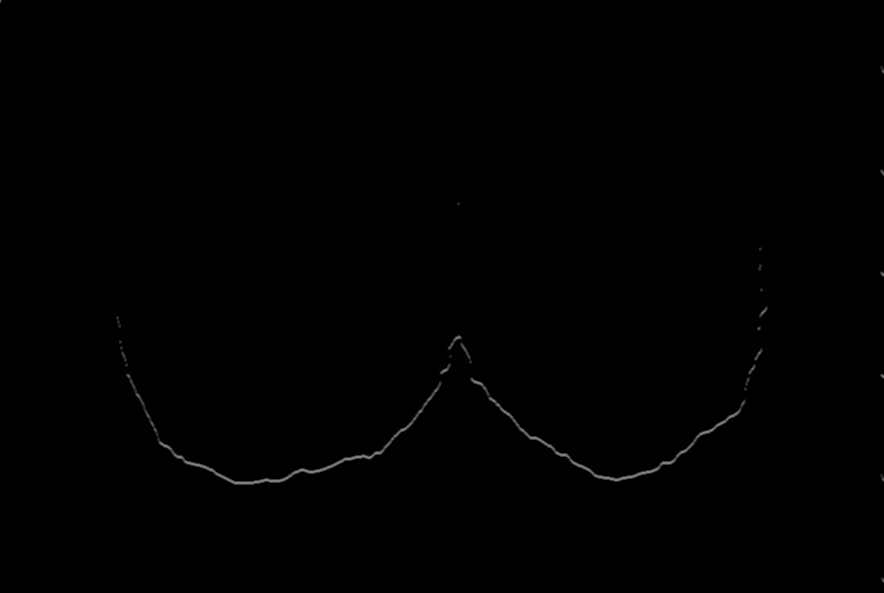

In [5]:
krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
grad_v = imfilter(img_channel, krnl_v')

# Extracting the Contour on the image

In [7]:
# reduce = 10
# Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
# Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
# Gray.(Gray_img_contour)

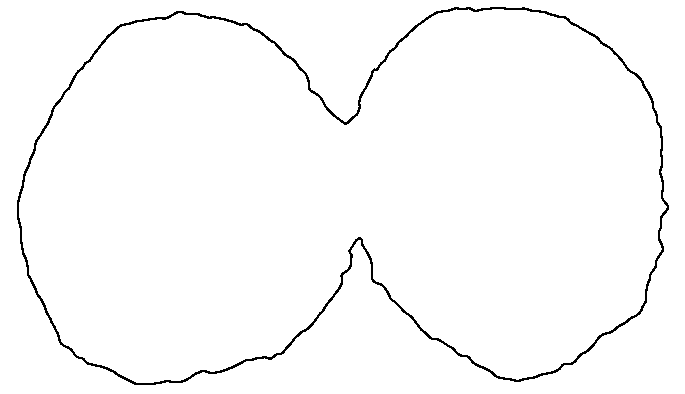

In [10]:
reduce = [100,100,100,100] # [up,down,left,right]
final_img = (grad_h.^2) .+ (grad_v.^2)
final_img = Gray.(.!(Gray.(final_img) .> 0.1))
final_img = final_img[reduce[1]:size(final_img)[1]-reduce[2],reduce[3]:size(final_img)[2]-reduce[4]]

# Extracting the index of each point

In [96]:
# idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
# arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

In [11]:
idx = CartesianIndices(size(final_img))[final_img .== 0]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

4910×2 Matrix{Int64}:
  18  201
  18  202
  18  203
  18  204
  18  205
  18  206
  18  207
  18  208
  18  209
  18  210
   ⋮  
 668  208
 668  209
 668  210
 668  211
 669  206
 669  207
 669  208
 669  209
 669  210

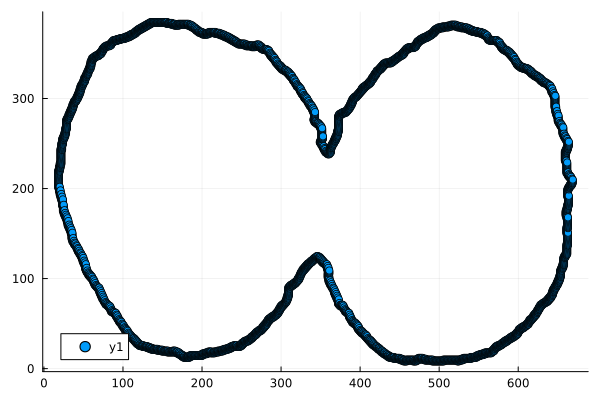

In [12]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

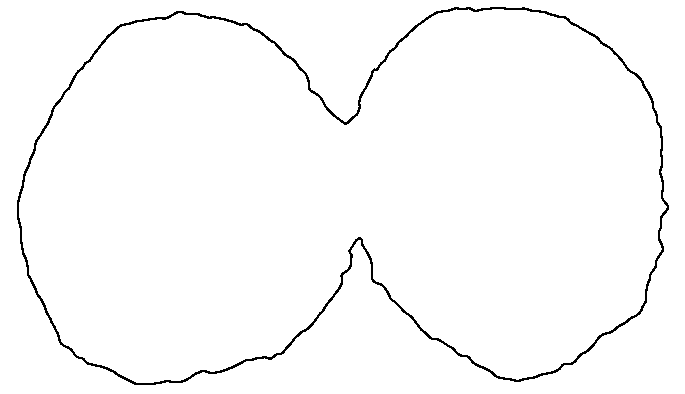

In [13]:
final_img

In [14]:
center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

1×2 Matrix{Float64}:
 346.218  197.229

# Putting the index in the center of mass

In [15]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

4910×2 Matrix{Float64}:
 -328.218   3.77128
 -328.218   4.77128
 -328.218   5.77128
 -328.218   6.77128
 -328.218   7.77128
 -328.218   8.77128
 -328.218   9.77128
 -328.218  10.7713
 -328.218  11.7713
 -328.218  12.7713
    ⋮      
  321.782  10.7713
  321.782  11.7713
  321.782  12.7713
  321.782  13.7713
  322.782   8.77128
  322.782   9.77128
  322.782  10.7713
  322.782  11.7713
  322.782  12.7713

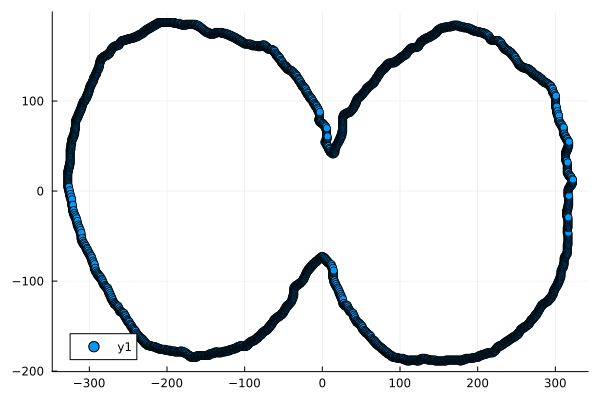

In [16]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [17]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

4910×2 Matrix{Float64}:
 89.3417  328.24
 89.1672  328.253
 88.9926  328.269
 88.8181  328.288
 88.6436  328.31
 88.4692  328.335
 88.2948  328.363
 88.1204  328.395
 87.946   328.429
 87.7717  328.466
  ⋮       
 91.9172  321.962
 92.095   321.997
 92.2728  322.035
 92.4506  322.077
 91.5566  322.901
 91.7339  322.93
 91.9113  322.962
 92.0885  322.997
 92.2658  323.035

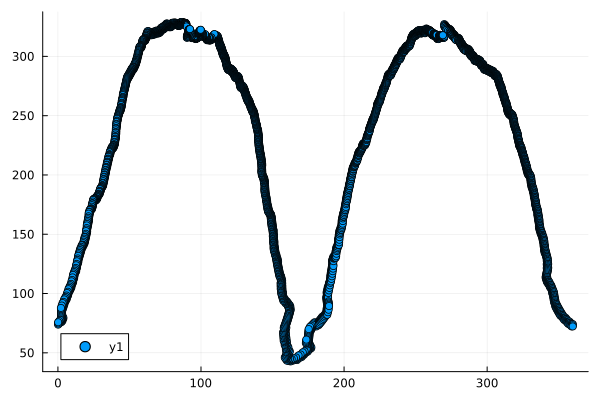

In [18]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)

In [19]:
findmin(center_idx_cil_coord[:,1])

(0.16478553220069614, 2401)

In [20]:
findmax(center_idx_cil_coord[:,1])

(359.83179003645137, 2396)